# WeatherPy
An analysis of temperature, cloudiness, humidity, and wind speed in relation to latitude using randomly generated cities that are somewhat evenly spaced apart.<br><br>
Code by: Ricardo G. Mora, Jr.  (10/22/2021)<br><br>
City names provided by: CityPy (https://pypi.org/project/citipy)<br>
Weather data proved by: OpenWeather (https://openweathermap.org)<br><br>
#### Note:
* To run this notebook's code, you will need an API key from OpenWeather.  Name it "weather_api_key" and place it in a file named "api_keys" in this notebook's directory.<br>
* A csv file containing the list of cities generated by this notebook will be placed into folder "output_data" along with png images of all the plots created.

#### Libraries, File Dependencies, and Other Setups


In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from time import sleep
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Import citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

----
## Get Weather for Cities Around The World

#### Generate Cities List
* Generate random global coordinates that are reasonably equidistant from each other.
* Use CityPy to get the names of cities closest to the random coordinates.
* Make sure that each city is not duplicated in the list.
* Make sure there are at least 500 cities in the list.

In [2]:
# Create lists for holding city names and city coordinates
citylist = []
coordinateslist = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
coordinateslist = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in coordinateslist:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in citylist:
        citylist.append(city)

# Print the city count to confirm sufficient count (should be more than 500)
if len(citylist) < 500:
    print("Not enough cities were generated.")
    print("Please re-run this section.")
else:
    print(f"Number of cities generated: {len(citylist)}")
    print("Continue with next section.")

Number of cities generated: 606
Continue with next section.


#### Get Weather for Each City in List
* Use the OpenWeather API to get the weather for each city.
* Because the process takes **several minutes**, print a status for each city as it is processed.
* If OpenWeather does not have weather for a city, print a message indicating this.
* Print a message when all cities have been processed with the number of successful retrievals.
<br>

#### Note: This block of code takes several minutes to execute.  Go get some coffee.

In [3]:
# Define openweather base query string
units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Create lists to hold the weather data
stationlats = []
stationlngs = []
cities = []
countries = []
maxtemps = []
humidities = []
cloudiness = []
windspeeds = []
dates = []

# Set time delay for repetitive API calls to OpenWeather
# OpenWeather has a 60 queries per minute limit
timedelay = 0.5

# Display start message
print("Weather Data Retrieval In Progress")
print("  (This will take a few minues.)")
print("----------------------------------")

# Loop through all cities in citylist and get their respective weather info from OpenWeather
# Display status message
for index, city in enumerate(citylist, start=1):
    response = requests.get(query_url + city).json()
    sleep(timedelay)  # Time delay to not exceed 60 query per minute limit
    try:
        print(f"Getting weather in city # {index} ({city})")
        stationlats.append(response["coord"]["lat"])
        stationlngs.append(response["coord"]["lon"])
        maxtemps.append(response["main"]["temp_max"])
        humidities.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeeds.append(response["wind"]["speed"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
        cities.append(city)
    except:
        print("City not found. Skipping...")
    
# Display finished message
print("-------------------------------")
print("Weather Data Retrieval Complete")
print(f"Weather found for {len(dates)} out of {len(citylist)} cities")
print("-------------------------------")

Weather Data Retrieval In Progress
  (This will take a few minues.)
----------------------------------
Getting weather in city # 1 (taolanaro)
City not found. Skipping...
Getting weather in city # 2 (bury saint edmunds)
City not found. Skipping...
Getting weather in city # 3 (castro)
Getting weather in city # 4 (sur)
Getting weather in city # 5 (torbay)
Getting weather in city # 6 (jamestown)
Getting weather in city # 7 (faya)
Getting weather in city # 8 (puerto leguizamo)
Getting weather in city # 9 (cherskiy)
Getting weather in city # 10 (balikpapan)
Getting weather in city # 11 (georgetown)
Getting weather in city # 12 (rikitea)
Getting weather in city # 13 (barrow)
Getting weather in city # 14 (vardo)
Getting weather in city # 15 (dikson)
Getting weather in city # 16 (la brea)
Getting weather in city # 17 (sawakin)
Getting weather in city # 18 (vaini)
Getting weather in city # 19 (estelle)
Getting weather in city # 20 (salinas)
Getting weather in city # 21 (bambous virieux)
Getting

Getting weather in city # 188 (tuktoyaktuk)
Getting weather in city # 189 (cabo san lucas)
Getting weather in city # 190 (yarada)
Getting weather in city # 191 (galiwinku)
City not found. Skipping...
Getting weather in city # 192 (praia da vitoria)
Getting weather in city # 193 (palmeiras de goias)
Getting weather in city # 194 (ust-kamchatsk)
City not found. Skipping...
Getting weather in city # 195 (paamiut)
Getting weather in city # 196 (alofi)
Getting weather in city # 197 (obertyn)
Getting weather in city # 198 (te anau)
Getting weather in city # 199 (vostok)
Getting weather in city # 200 (voh)
Getting weather in city # 201 (orocue)
Getting weather in city # 202 (mandalay)
Getting weather in city # 203 (srednekolymsk)
Getting weather in city # 204 (chicama)
Getting weather in city # 205 (hualmay)
Getting weather in city # 206 (prince rupert)
Getting weather in city # 207 (nakhon phanom)
Getting weather in city # 208 (diamantino)
Getting weather in city # 209 (agirish)
Getting weat

Getting weather in city # 375 (viedma)
Getting weather in city # 376 (saskylakh)
Getting weather in city # 377 (guerrero negro)
Getting weather in city # 378 (antofagasta)
Getting weather in city # 379 (uyuni)
Getting weather in city # 380 (pouebo)
Getting weather in city # 381 (qaqortoq)
Getting weather in city # 382 (staroutkinsk)
Getting weather in city # 383 (sinnamary)
Getting weather in city # 384 (matara)
Getting weather in city # 385 (saint anthony)
Getting weather in city # 386 (aksarka)
Getting weather in city # 387 (san ramon)
Getting weather in city # 388 (baishishan)
Getting weather in city # 389 (vanino)
Getting weather in city # 390 (ekhabi)
Getting weather in city # 391 (baykit)
Getting weather in city # 392 (gobabis)
Getting weather in city # 393 (sibolga)
Getting weather in city # 394 (lolua)
City not found. Skipping...
Getting weather in city # 395 (mpulungu)
Getting weather in city # 396 (gombong)
Getting weather in city # 397 (puerto colombia)
Getting weather in ci

Getting weather in city # 561 (tiksi)
Getting weather in city # 562 (rudbar)
Getting weather in city # 563 (feijo)
Getting weather in city # 564 (zitlala)
Getting weather in city # 565 (mizan teferi)
Getting weather in city # 566 (deurne)
Getting weather in city # 567 (lagoa)
Getting weather in city # 568 (ahipara)
Getting weather in city # 569 (bayburt)
Getting weather in city # 570 (dudinka)
Getting weather in city # 571 (waingapu)
Getting weather in city # 572 (berwick)
Getting weather in city # 573 (biak)
Getting weather in city # 574 (topolobampo)
Getting weather in city # 575 (araguatins)
City not found. Skipping...
Getting weather in city # 576 (foz)
Getting weather in city # 577 (huntingdon)
Getting weather in city # 578 (mundo nuevo)
Getting weather in city # 579 (skjervoy)
Getting weather in city # 580 (cabedelo)
Getting weather in city # 581 (tumannyy)
City not found. Skipping...
Getting weather in city # 582 (san carlos)
Getting weather in city # 583 (benghazi)
Getting weat

#### Convert Raw Data to DataFrame
* Export the city data into a csv file (include header row and panda index column).
* Display the DataFrame.
* Display summary statistics for the DataFrame.

In [4]:
# Create and display a table with the weather data found above
raw_weather_data = pd.DataFrame({
    "City": cities,
    "Country": countries,
    "Latitude": stationlats,
    "Longitude": stationlngs,
    "Max Temp (F)": maxtemps,
    "Humidity (%)": humidities,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": windspeeds,
    "Date (Unix)": dates
})
print("Weather data provided by OpenWeather")
raw_weather_data.head()

Weather data provided by OpenWeather


,City,Country,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date (Unix)
0,castro,BR,-24.7911,-50.0119,72.86,57,100,6.78,1635017182
1,sur,OM,22.5667,59.5289,81.70,60,0,7.65,1635017341
2,torbay,CA,47.6666,-52.7314,63.37,90,75,13.80,1635017342
3,jamestown,US,42.0970,-79.2353,51.39,92,90,5.01,1635017259
4,faya,SA,18.3851,42.4509,63.12,28,3,6.02,1635017344


In [5]:
# Save data table to csv file
raw_weather_data.to_csv(output_data_file)
print(f"Raw weather data saved to: {output_data_file}")

Raw weather data saved to: output_data/cities.csv


In [6]:
# Display general statistics
print("Weather data provided by OpenWeather")
raw_weather_data.describe()

Weather data provided by OpenWeather


,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date (Unix)
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,21.066124,19.573815,60.385091,72.156364,57.801818,7.903818,1.635018e+09
std,32.980838,89.930560,20.838161,19.952519,39.996389,5.629231,1.505851e+02
min,-54.800000,-175.200000,-14.440000,7.000000,0.000000,0.000000,1.635017e+09
25%,-5.467250,-58.213225,44.582500,61.000000,12.250000,3.565000,1.635017e+09
50%,23.028800,22.734800,64.545000,76.000000,75.000000,6.710000,1.635018e+09
75%,48.874750,101.413600,77.242500,88.000000,99.000000,11.017500,1.635018e+09
max,78.218600,179.316700,96.690000,100.000000,100.000000,36.820000,1.635018e+09


#### Remove cities where humidity > 100% or cloudiness > 100%
* This step is usually not necessary.
* However, if any cities do have humidity or cloudiness > 100%, it indicates erroneous data, and those cities should be removed from the data set.

In [7]:
world_weather_data = raw_weather_data.loc[raw_weather_data["Humidity (%)"] <= 100]
world_weather_data = raw_weather_data.loc[raw_weather_data["Cloudiness (%)"] <= 100]
print("Weather data provided by OpenWeather")
world_weather_data.describe()

Weather data provided by OpenWeather


,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date (Unix)
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,21.066124,19.573815,60.385091,72.156364,57.801818,7.903818,1.635018e+09
std,32.980838,89.930560,20.838161,19.952519,39.996389,5.629231,1.505851e+02
min,-54.800000,-175.200000,-14.440000,7.000000,0.000000,0.000000,1.635017e+09
25%,-5.467250,-58.213225,44.582500,61.000000,12.250000,3.565000,1.635017e+09
50%,23.028800,22.734800,64.545000,76.000000,75.000000,6.710000,1.635018e+09
75%,48.874750,101.413600,77.242500,88.000000,99.000000,11.017500,1.635018e+09
max,78.218600,179.316700,96.690000,100.000000,100.000000,36.820000,1.635018e+09


---
## Scatter Plots of World Cities Weather Data

#### Latitude vs. Temperature

In [8]:
# Convert Unix date to standard date
date = time.strftime("%m/%d/%y",time.gmtime(world_weather_data["Date (Unix)"].mean()))
print(f"World weather data was measured on {date}.")

World weather data was measured on 10/23/21.


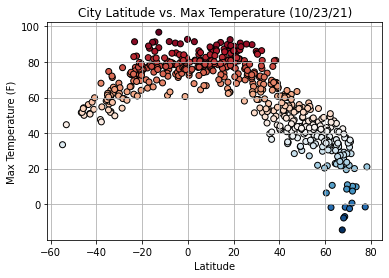

In [9]:
# Create a scatter diagram from the weather data table using latitude and Max Temperature columns
plt.scatter(world_weather_data["Latitude"], world_weather_data["Max Temp (F)"], edgecolors = "black", c=-world_weather_data["Max Temp (F)"], cmap="RdBu")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.grid()
plt.savefig("output_data/world_temps.png")
plt.show()

Observation:  There are more cities in the northern hemisphere than in the southern hemisphere.<br>
Observation:  Cities in the southern hemisphere do not extend as far from the equator as they do in the northern hemisphere.<br>
Observation:  Temperatures are warmer for cities nearer the equator that those farther away.<br>
Observation:  The variation in temperatures at each latitude appears relatively constant.

#### Latitude vs. Humidity

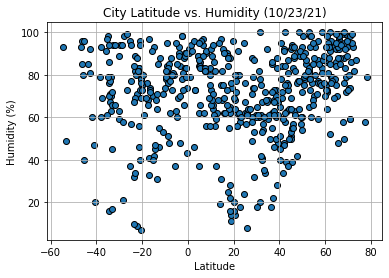

In [10]:
# Create a scatter diagram from the weather data table using latitude and Humidity columns
plt.scatter(world_weather_data["Latitude"], world_weather_data["Humidity (%)"], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid()
plt.savefig("output_data/world_humidities.png")
plt.show()

Observation:  Humidity appears unaffected by latitude.

#### Latitude vs. Cloudiness

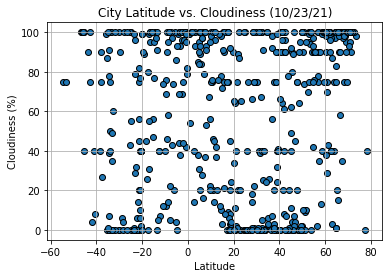

In [11]:
# Create a scatter diagram from the weather data table using latitude and Cloudiness columns
plt.scatter(world_weather_data["Latitude"], world_weather_data["Cloudiness (%)"], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid()
plt.savefig("output_data/world_cloudiness.png")
plt.show()

Observation:  Cloudiness appears unaffected by latitude.

#### Latitude vs. Wind Speed

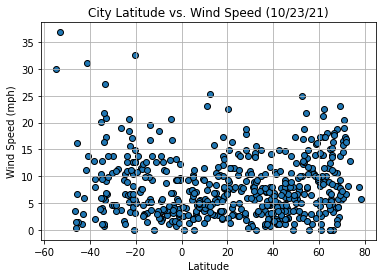

In [12]:
# Create a scatter diagram from the weather data table using latitude and Wind Speed columns
plt.scatter(world_weather_data["Latitude"], world_weather_data["Wind Speed (mph)"], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid()
plt.savefig("output_data/world_windspeeds.png")
plt.show()

Observation:  Wind speed appears unaffected by latitude.

---
## Linear Regression Analysis of World Cities Weather Data

#### Divide weather data into Northern and Southern Hemispheres

In [13]:
# Divide world weather data into 2 tables (northern hemisphere and southern hemisphere)
northern_weather_data = world_weather_data.loc[world_weather_data["Latitude"] > 0]
southern_weather_data = world_weather_data.loc[world_weather_data["Latitude"] < 0]

# Check if any cities were dropped
northerncitycount = northern_weather_data["City"].count()
southerncitycount = southern_weather_data["City"].count()
totalcitycount = world_weather_data["City"].count()

# Print success/fail message with city counts
if northerncitycount + southerncitycount != totalcitycount:
    print("Weather data was divided into northern and southern hemispheres, however, one or more cities were dropped.")
    print(f"   Northern hemisphere data has {northerncitycount} cities.")
    print(f"   Southern hemisphere data has {southerncitycount} cities.")
    print(f"   Original data had {totalcitycount} cities.")
else:
    print("Weather data was successfully divided into northern and southern hemispheres.")
    print(f"   Northern hemisphere data has {northerncitycount} cities.")
    print(f"   Southern hemisphere data has {southerncitycount} cities.")
    print(f"   Original data has {totalcitycount} cities.")


Weather data was successfully divided into northern and southern hemispheres.
   Northern hemisphere data has 384 cities.
   Southern hemisphere data has 166 cities.
   Original data has 550 cities.


####  Northern Hemisphere:  Max Temp vs. Latitude

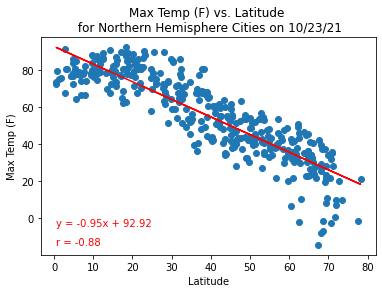

In [14]:
# Set region and data for analysis
region = "Northern Hemisphere"
x_data = northern_weather_data["Latitude"]
y_data = northern_weather_data["Max Temp (F)"]
outputfile = "output_data/northern_temps_analysis.png"

# Find the line of regression parameters
(m, b, r, p, stderr) = linregress(x_data, y_data)

# Create the line of regression data
y_regress = m * x_data + b

# Draw the scatter diagram
plt.scatter(x_data, y_data)
plt.xlabel(x_data.name)
plt.ylabel(y_data.name)
plt.title(f"{y_data.name} vs. {x_data.name} \n for {region} Cities on {date}")

# Draw the line of regression
plt.plot(x_data, y_regress, color="red")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(x_data.min(),y_data.min()+10))
plt.annotate(f"r = {r:.2f}", color="red", xy=(x_data.min(),y_data.min()))

# Show diagram and save to file
plt.savefig(outputfile)
plt.show()

Observation:  There appears to be a strong correlation between a city's temperature and it's latitude.<br>
Observation:  Temperature generally decreases as latitudes are farther north of the equator.

####  Southern Hemisphere:  Max Temp vs. Latitude

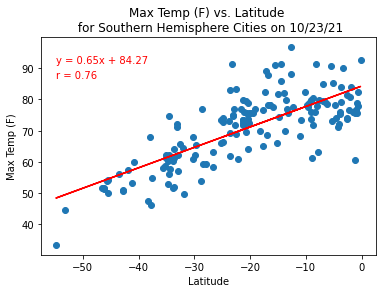

In [15]:
# Set region and data for analysis
region = "Southern Hemisphere"
x_data = southern_weather_data["Latitude"]
y_data = southern_weather_data["Max Temp (F)"]
outputfile = "output_data/southern_temps_analysis.png"

# Find the line of regression parameters
(m, b, r, p, stderr) = linregress(x_data, y_data)

# Create the line of regression data
y_regress = m * x_data + b

# Draw the scatter diagram
plt.scatter(x_data, y_data)
plt.xlabel(x_data.name)
plt.ylabel(y_data.name)
plt.title(f"{y_data.name} vs. {x_data.name} \n for {region} Cities on {date}")

# Draw the line of regression
plt.plot(x_data, y_regress, color="red")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(x_data.min(),y_data.max()-5))
plt.annotate(f"r = {r:.2f}", color="red", xy=(x_data.min(),y_data.max()-10))

# Show diagram and save to file
plt.savefig(outputfile)
plt.show()

Observation:  There appears to be a strong correlation between a city's temperature and it's latitude.<br>
Observation:  Temperature generally decreases as latitudes are farther south of the equator.

####  Northern Hemisphere:  Humidity vs. Latitude

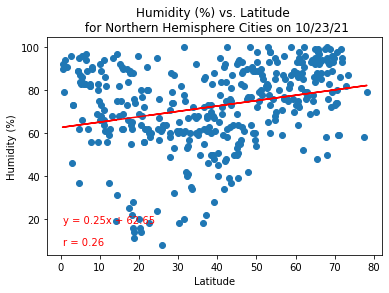

In [16]:
# Set region and data for analysis
region = "Northern Hemisphere"
x_data = northern_weather_data["Latitude"]
y_data = northern_weather_data["Humidity (%)"]
outputfile = "output_data/northern_humidities_analysis.png"

# Find the line of regression parameters
(m, b, r, p, stderr) = linregress(x_data, y_data)

# Create the line of regression data
y_regress = m * x_data + b

# Draw the scatter diagram
plt.scatter(x_data, y_data)
plt.xlabel(x_data.name)
plt.ylabel(y_data.name)
plt.title(f"{y_data.name} vs. {x_data.name} \n for {region} Cities on {date}")

# Draw the line of regression
plt.plot(x_data, y_regress, color="red")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(x_data.min(),y_data.min()+10))
plt.annotate(f"r = {r:.2f}", color="red", xy=(x_data.min(),y_data.min()))

# Show diagram and save to file
plt.savefig(outputfile)
plt.show()

Observation: The correlation between a city's humidity and it's latitude appears weak.

####  Southern Hemisphere:  Humidity vs. Latitude

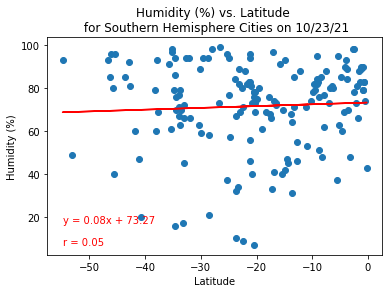

In [17]:
# Set region and data for analysis
region = "Southern Hemisphere"
x_data = southern_weather_data["Latitude"]
y_data = southern_weather_data["Humidity (%)"]
outputfile = "output_data/southern_humidities_analysis.png"

# Find the line of regression parameters
(m, b, r, p, stderr) = linregress(x_data, y_data)

# Create the line of regression data
y_regress = m * x_data + b

# Draw the scatter diagram
plt.scatter(x_data, y_data)
plt.xlabel(x_data.name)
plt.ylabel(y_data.name)
plt.title(f"{y_data.name} vs. {x_data.name} \n for {region} Cities on {date}")

# Draw the line of regression
plt.plot(x_data, y_regress, color="red")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(x_data.min(),y_data.min()+10))
plt.annotate(f"r = {r:.2f}", color="red", xy=(x_data.min(),y_data.min()))

# Show diagram and save to file
plt.savefig(outputfile)
plt.show()

Observation: The correlation between a city's humidity and it's latitude appears weak.

####  Northern Hemisphere:  Cloudiness vs. Latitude

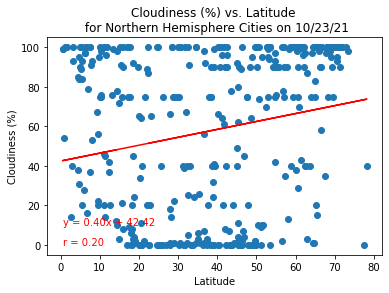

In [18]:
# Set region and data for analysis
region = "Northern Hemisphere"
x_data = northern_weather_data["Latitude"]
y_data = northern_weather_data["Cloudiness (%)"]
outputfile = "output_data/northern_cloudiness_analysis.png"

# Find the line of regression parameters
(m, b, r, p, stderr) = linregress(x_data, y_data)

# Create the line of regression data
y_regress = m * x_data + b

# Draw the scatter diagram
plt.scatter(x_data, y_data)
plt.xlabel(x_data.name)
plt.ylabel(y_data.name)
plt.title(f"{y_data.name} vs. {x_data.name} \n for {region} Cities on {date}")

# Draw the line of regression
plt.plot(x_data, y_regress, color="red")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(x_data.min(),y_data.min()+10))
plt.annotate(f"r = {r:.2f}", color="red", xy=(x_data.min(),y_data.min()))

# Show diagram and save to file
plt.savefig(outputfile)
plt.show()

Observation: The correlation between a city's cloudiness and it's latitude appears weak.

####  Southern Hemisphere:  Cloudiness vs. Latitude

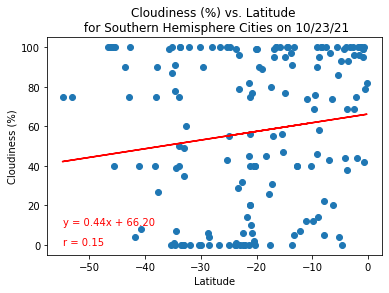

In [19]:
# Set region and data for analysis
region = "Southern Hemisphere"
x_data = southern_weather_data["Latitude"]
y_data = southern_weather_data["Cloudiness (%)"]
outputfile = "output_data/southern_cloudiness_analysis.png"

# Find the line of regression parameters
(m, b, r, p, stderr) = linregress(x_data, y_data)

# Create the line of regression data
y_regress = m * x_data + b

# Draw the scatter diagram
plt.scatter(x_data, y_data)
plt.xlabel(x_data.name)
plt.ylabel(y_data.name)
plt.title(f"{y_data.name} vs. {x_data.name} \n for {region} Cities on {date}")

# Draw the line of regression
plt.plot(x_data, y_regress, color="red")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(x_data.min(),y_data.min()+10))
plt.annotate(f"r = {r:.2f}", color="red", xy=(x_data.min(),y_data.min()))

# Show diagram and save to file
plt.savefig(outputfile)
plt.show()

Observation: The correlation between a city's cloudiness and it's latitude appears weak.

####  Northern Hemisphere:  Wind Speed vs. Latitude

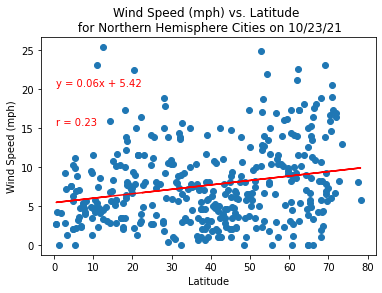

In [20]:
# Set region and data for analysis
region = "Northern Hemisphere"
x_data = northern_weather_data["Latitude"]
y_data = northern_weather_data["Wind Speed (mph)"]
outputfile = "output_data/northern_windspeeds_analysis.png"

# Find the line of regression parameters
(m, b, r, p, stderr) = linregress(x_data, y_data)

# Create the line of regression data
y_regress = m * x_data + b

# Draw the scatter diagram
plt.scatter(x_data, y_data)
plt.xlabel(x_data.name)
plt.ylabel(y_data.name)
plt.title(f"{y_data.name} vs. {x_data.name} \n for {region} Cities on {date}")

# Draw the line of regression
plt.plot(x_data, y_regress, color="red")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(x_data.min(),y_data.max()-5))
plt.annotate(f"r = {r:.2f}", color="red", xy=(x_data.min(),y_data.max()-10))

# Show diagram and save to file
plt.savefig(outputfile)
plt.show()

Observation: The correlation beween a city's wind speed and it's latitude appears weak.

####  Southern Hemisphere:  Wind Speed vs. Latitude

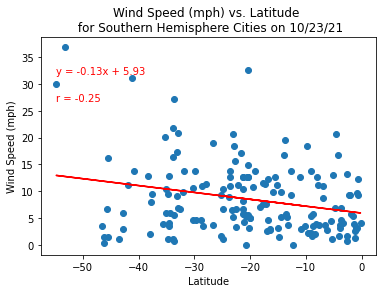

In [21]:
# Set region and data for analysis
region = "Southern Hemisphere"
x_data = southern_weather_data["Latitude"]
y_data = southern_weather_data["Wind Speed (mph)"]
outputfile = "output_data/southern_windspeeds_analysis.png"

# Find the line of regression parameters
(m, b, r, p, stderr) = linregress(x_data, y_data)

# Create the line of regression data
y_regress = m * x_data + b

# Draw the scatter diagram
plt.scatter(x_data, y_data)
plt.xlabel(x_data.name)
plt.ylabel(y_data.name)
plt.title(f"{y_data.name} vs. {x_data.name} \n for {region} Cities on {date}")

# Draw the line of regression
plt.plot(x_data, y_regress, color="red")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(x_data.min(),y_data.max()-5))
plt.annotate(f"r = {r:.2f}", color="red", xy=(x_data.min(),y_data.max()-10))

# Show diagram and save to file
plt.savefig(outputfile)
plt.show()

Observation: The correlation beween a city's wind speed and it's latitude appears weak.